In [34]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import missingno as msno
import math
import pylab
import scipy.stats as stats


sns.palplot(sns.color_palette('deep'))
sns.set_style("whitegrid")
%matplotlib inline
%matplotlib inline
sns.set()

In [22]:
cols = [
    'id',
    'host_id',
    '',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

'', '', '', '', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', '', '',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'

data = pd.read_csv('data/listings_feb21.csv', low_memory=False, index_col='id')

In [20]:
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [26]:
# # determine the number of missing entries in each column
# for col in data.columns:
#     print('Number of Missing Values in '+ col +':', len(data[col][data[col].isnull()]))

In [25]:
# Now lets check the shape of the df and also see if there are any duplicates 
print(data.shape)
print("This dataset contains {} duplicate values.".format(data.duplicated().sum()))

(10272, 15)
This dataset contains 50 duplicate values.


In [28]:
# Specifying max_cols=df.shape[1] so we can look at all the columns in df.info()
data.info(max_cols=data.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 2265 to 48111525
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            10272 non-null  object 
 1   host_id                         10272 non-null  int64  
 2   host_name                       10267 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   10272 non-null  int64  
 5   latitude                        10272 non-null  float64
 6   longitude                       10272 non-null  float64
 7   room_type                       10272 non-null  object 
 8   price                           10272 non-null  int64  
 9   minimum_nights                  10272 non-null  int64  
 10  number_of_reviews               10272 non-null  int64  
 11  last_review                     7672 non-null   object 
 12  reviews_per_month         

In [33]:
# Sorting null columns based on the number of null values in each column
print('Columns with Null values by their count:')
data.isnull().sum().sort_values(ascending=False)

Columns with Null values by their count:


neighbourhood_group               10272
reviews_per_month                  2600
last_review                        2600
host_name                             5
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
name                                  0
dtype: int64

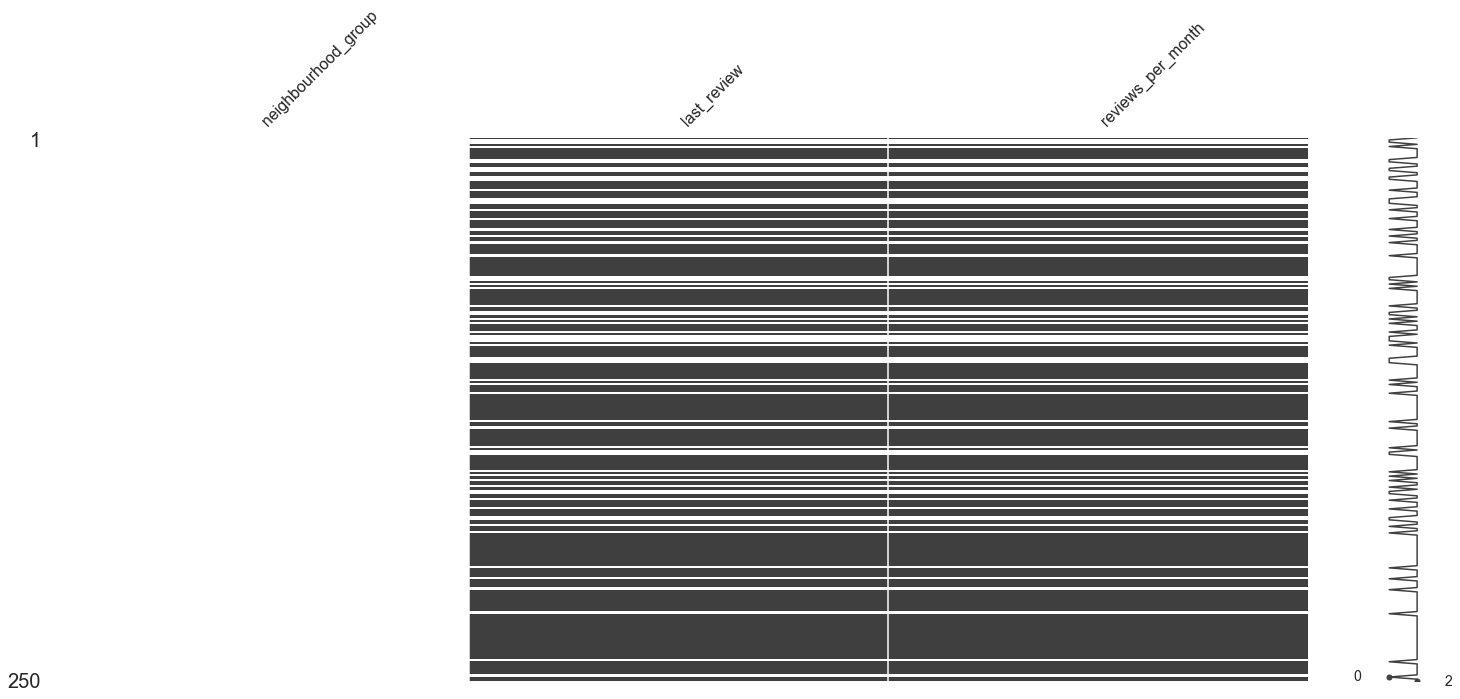

In [35]:
filtered_data = msno.nullity_filter(data, filter='bottom', n=25, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))

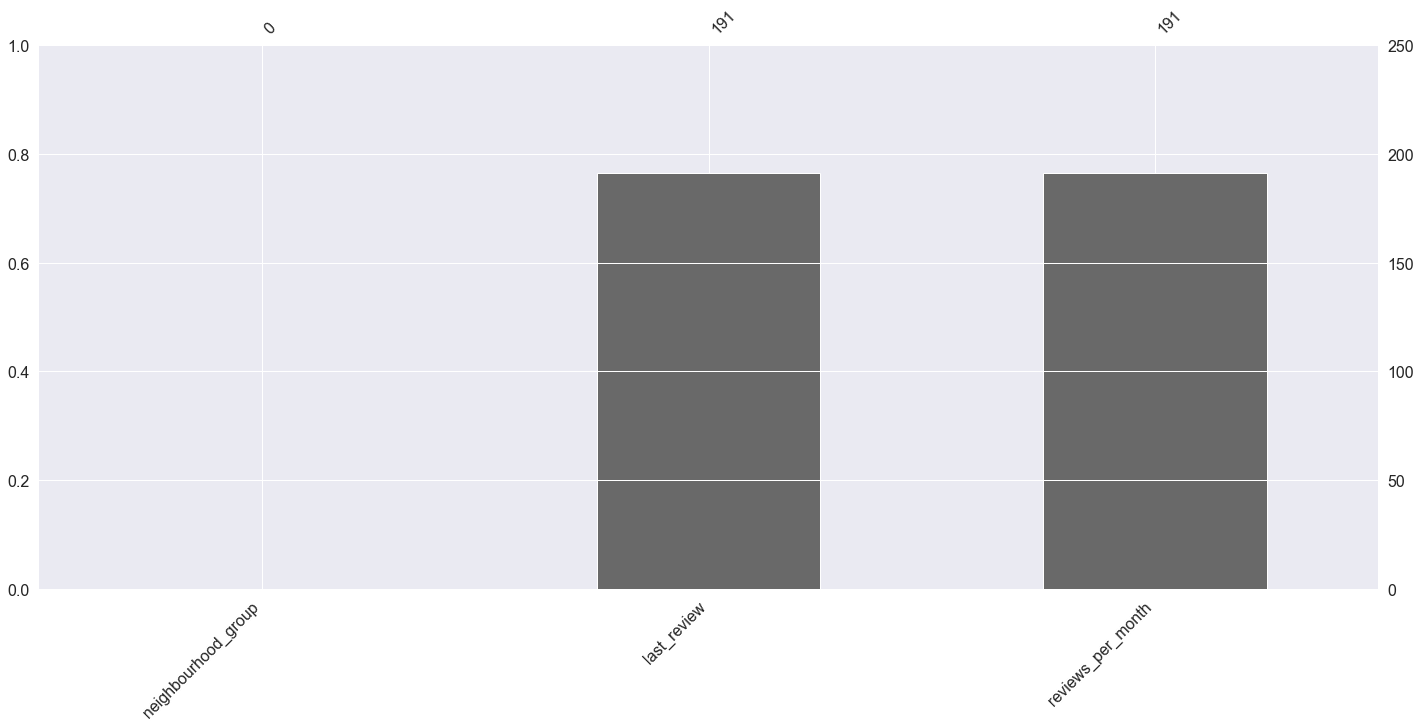

In [36]:
msno.bar(filtered_data.sample(250))

In [40]:
# Comparing 'price' with 'monthly_price' and 'weekly_price' to see which ones we need to keep
data['price'].head()

id
2265    200
5245    114
5456    104
5636     46
5769     39
Name: price, dtype: int64

In [42]:
# Looking at describe() to get some insights on 'price' and other numerical values
data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.098138e+07,NaN,78704.000000,30.245163,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,1.410198e+08,NaN,78745.000000,30.305237,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


In [44]:
# Looking at describe() to get some insights on 'price'
data.price.describe()

count    10272.000000
mean       255.656542
std        513.284268
min          0.000000
25%         82.000000
50%        136.000000
75%        250.000000
max      16264.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Rental Price Boxplot')

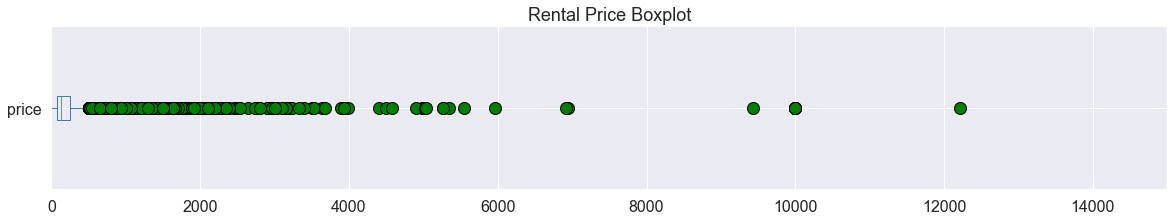

In [46]:
# Visualizing the 'price' column using boxplot and distplot
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
data['price'].plot(kind='box', xlim=(0, 15000), vert=False, figsize=(20,3), flierprops=flierprops, fontsize=16)
plt.title('Rental Price Boxplot', fontsize=18)

Text(0.5, 1.0, 'Price Density Plot')

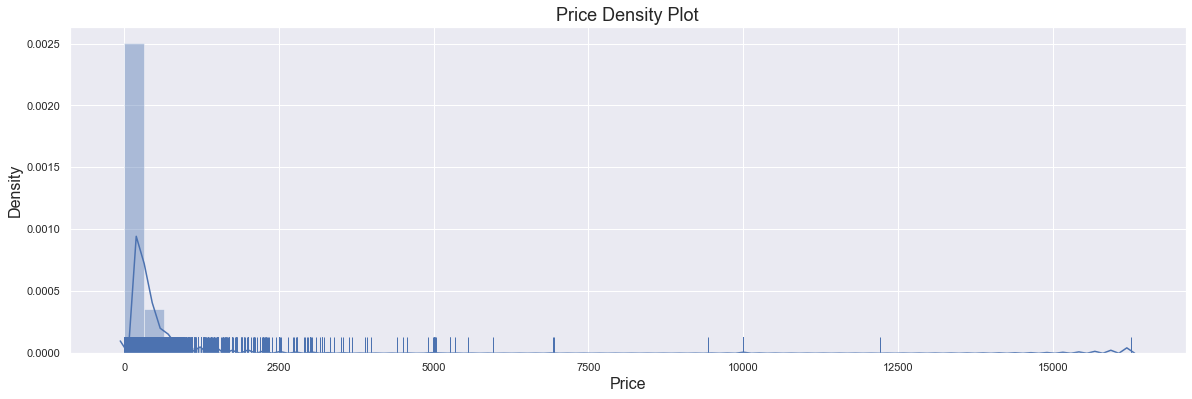

In [47]:
plt.figure(figsize=(20,6))
sns.distplot(data['price'], rug=True)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Price Density Plot', fontsize=18)

In [49]:
data['price'].isnull().sum()

0